# Project: Wrangle and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import os
import requests
import tweepy

# Gathering

__Twitter Archive Enhanced Data__

In [2]:
# load dataset
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


__Image Prediction File__

In [3]:
#Download tweet image predictions using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url)

#create file called image_predictions
with open('image_predictions.tsv', mode='wb') as file:
    file.write(image_request.content)
    
#Import the tweet image predictions TSV file into a DataFrame
image_prediction = pd.read_csv('image_predictions.tsv', sep ='\t')
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


__Twitter API and JSON__

In [4]:
consumer_key ="Hidden"
consumer_secret ="Hidden"
access_token = "Hidden"
access_secret = "Hidden"

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = twitter_archive["tweet_id"].values
len(tweet_ids)

2356

In [7]:
# For loop which will add each available tweet to a new line of tweet-json.txt
with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json,file)
            file.write('\n')
        except:
            continue

In [8]:
twitter_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet_json.txt', 'r'):
    data = json.loads(line)
    twitter_list.append({'tweet_id': data['id_str'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],
                        'followers_count': data['user']['followers_count']})

In [9]:
# twitter_list

In [10]:
# Convert the list of dictionaries to a pandas DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [11]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
tweet_id           2325 non-null object
retweet_count      2325 non-null int64
favorite_count     2325 non-null int64
followers_count    2325 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.7+ KB


# Accessing Data

__Visual Assessment__

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
twitter_data

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,6876,32867,9380666
1,892177421306343426,5178,28393,9380666
2,891815181378084864,3420,21344,9380666
3,891689557279858688,7083,35831,9380666
4,891327558926688256,7592,34273,9380666
5,891087950875897856,2547,17240,9380666
6,890971913173991426,1620,10060,9380666
7,890729181411237888,15443,55287,9380667
8,890609185150312448,3554,23788,9380666
9,890240255349198849,5983,27121,9380666


__Programmatic Assessment__

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


__Twitter_archive assessment__

In [17]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [18]:
# twitter_archive['in_reply_to_status_id'].value_counts()

In [19]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
twitter_archive['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [21]:
twitter_archive['expanded_urls'].isnull().sum()

59

In [22]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
pd.set_option('display.max_rows', 1000)
twitter_archive['name'].value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Penny              10
Tucker             10
Lola               10
Winston             9
Bo                  9
the                 8
Sadie               8
Toby                7
Daisy               7
an                  7
Buddy               7
Bailey              7
Oscar               6
Rusty               6
Jack                6
Leo                 6
Koda                6
Scout               6
Stanley             6
Bella               6
Dave                6
Milo                6
Jax                 6
George              5
Chester             5
very                5
Alfie               5
Sunny               5
Phil                5
Larry               5
Bentley             5
Finn                5
Sammy               5
Oakley              5
Gus                 5
Louis               5
Moose               4
Clark               4
Dexter              4
quite     

In [25]:
twitter_archive[twitter_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
                [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


__Image_prediction assessment__

In [28]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [30]:
image_prediction[image_prediction['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [31]:
image_prediction['p1'].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
German_shepherd                    20
Staffordshire_bullterrier          20
Siberian_husky                     20
Cardigan                           19
web_site                           19
Maltese_dog                        18
teddy                              18
beagle                             18
Shetland_sheepdog                  18
Eskimo_dog                         18
Rottweiler                         17
Lakeland_ter

In [32]:
image_prediction['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
chow                               20
miniature_pinscher                 20
Samoyed                            20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [33]:
image_prediction['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

__Twitter data assessment__

In [34]:
twitter_data

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,6876,32867,9380666
1,892177421306343426,5178,28393,9380666
2,891815181378084864,3420,21344,9380666
3,891689557279858688,7083,35831,9380666
4,891327558926688256,7592,34273,9380666
5,891087950875897856,2547,17240,9380666
6,890971913173991426,1620,10060,9380666
7,890729181411237888,15443,55287,9380667
8,890609185150312448,3554,23788,9380666
9,890240255349198849,5983,27121,9380666


In [35]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
tweet_id           2325 non-null object
retweet_count      2325 non-null int64
favorite_count     2325 non-null int64
followers_count    2325 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.7+ KB


### Quality Issues

__Twitter Enhanced Archive data__

a. Incorrect data type for some columns (eg. tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp)	

b. Some rating values with decimals are incorrectly assigned

c. Missing values in columns like expanded urls,in_reply_to_user_id,etc

d. Incorrect names of Dog(e.g a,all,an,bo)

e. The text columns contain a short link at the end of each text

f. The Source Column still in its Html format

g. Extremely large rating numerator and values which are likely to be outliers

h. Retweeted text present and may act as duplicity of data

i. converting column datatypes to its correct format for example, date columns to datatime
k. 


__Image Prediction Data__

a. Incorrect datatypes

b. inconsistent alphabeth case in p1,p2,p3

__Twitter Data__

a. Incorrect datatypes

b. missing texts


## Tidiness

a. clubbing the the four gog stages (doggo, floofer, pupper, puppo)  and renamed to dog stage

b.Merging all the dataframe



# Cleaning Data

In [36]:
 # Make copies to keep the original datasets
df_archive = twitter_archive.copy()
df_image = image_prediction.copy()
df_twitter = twitter_data.copy()

__Define__

Remove all retweeted posts

__Clean__

In [37]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [38]:
df_archive = df_archive[df_archive["retweeted_status_id"].isnull()]

__Test__

In [39]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [42]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage'],
      dtype='object')

In [43]:
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN


In [44]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,NaN


__Define__

1. Delete columns that are not needed any longer and fill all nan in dog stage with none

__Clean__

In [45]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dog_stage                     364 non-

In [46]:
col = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
       'retweeted_status_timestamp','doggo','floofer','pupper','puppo','expanded_urls']
df_archive.drop(columns = col, inplace = True)

In [47]:
df_archive["dog_stage"].fillna("none", inplace =True)

__Test__

In [48]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: int64(3), object(5)
memory usage: 152.9+ KB


__Define__

fix the wrong datatypes

__Code__

In [49]:
df_archive['tweet_id'] = df_archive['tweet_id'].astype(str)
df_image['tweet_id'] = df_image['tweet_id'].astype(str)
df_twitter['tweet_id'] = df_twitter['tweet_id'].astype(str)

# convert timestamp to datetime
df_archive['timestamp'] = df_archive['timestamp'].str[:-6]
df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])

# convert source to category datatype
df_archive['source']= df_archive['source'].astype("category")

__Test__

In [50]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 138.2+ KB


In [51]:
df_archive.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,none


__Define__

Change the source column from html format to text

__Code__

In [52]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [53]:
df_archive['source'] =df_archive['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':"Twitter for iPhone",
                                                   '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                   '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
                                                   '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'})

__Test__

In [54]:
df_archive['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

__Define__

correct numerators decimals extracted wrongly

__Code__

In [55]:
# df_archive[df_archive["text"].str.contains("@dog_rates")]

In [56]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]

            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [57]:
#convert interger type for ratings to float
df_archive[['rating_numerator', 'rating_denominator']] = df_archive[['rating_numerator','rating_denominator']].astype(float)

#change data with decimals to correct values
df_archive.loc[(df_archive.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_archive.loc[(df_archive.tweet_id == 832215909146226688), 'rating_numerator'] = 9.75
df_archive.loc[(df_archive.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_archive.loc[(df_archive.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_archive.loc[(df_archive.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df_archive.loc[(df_archive.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

__Test__

In [58]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 152.9+ KB


__Define__

Deal with incorrect names

__Clean__

In [59]:
df_archive["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

In [60]:
df_archive['name'][df_archive['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


__Test__

In [61]:
df_archive.name.value_counts()

None              784
Lucy               11
Charlie            11
Oliver             10
Cooper             10
Penny               9
Tucker              9
Winston             8
Lola                8
Sadie               8
Daisy               7
Toby                7
Bella               6
Oscar               6
Koda                6
Bailey              6
Stanley             6
Jax                 6
Bo                  6
Rusty               5
Scout               5
Leo                 5
Louis               5
Chester             5
Milo                5
Bentley             5
Dave                5
Buddy               5
Jeffrey             4
Clarence            4
Gary                4
Sophie              4
Maggie              4
Duke                4
Clark               4
Dexter              4
Bear                4
Oakley              4
Archie              4
Cassie              4
Gus                 4
Brody               4
Reggie              4
Sammy               4
Alfie               4
Derek     

__Define__

Remove the hyperlink in the text column

__Code__

In [62]:
#define function and apply to archive_clean table
def textlink(a):
        http_ = a.find("http")
        # If no link, retain row
        if http_ == -1:
            a= a
        else:
            # Remove space before link to end
            a = a[:http_ - 1]
        return a
    
df_archive['text'] = df_archive['text'].apply(textlink) 

__Test__

In [63]:
df_archive.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,none
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,none
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,none


__Define__

drop rows with no image

__Clean__

In [68]:
 # drop rows with no image
df_clean.dropna(axis = 0, inplace=True)

__Test__

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
source                1986 non-null object
text                  1986 non-null object
rating_numerator      1986 non-null float64
rating_denominator    1986 non-null float64
name                  1986 non-null object
dog_stage             1986 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null float64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null object
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null object
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null object
retweet_count         1986 non-null float64
favorite_count    

## Tidiness

__Define__

1. Make a new column called dog stage to house dog stages(doggo, floofer, pupper, puppo)

__Code__

In [40]:
# Extract the text from the columns into the new dog_stage column
df_archive['dog_stage'] = df_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')

__Test__

In [41]:
df_archive['dog_stage'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

__Define__

Merge the image predicton table and the twitter api table

__Code__

In [64]:
#merge the two tables
# df_clean = pd.merge(left=df_archive, right=df_twitter, how='left', on='tweet_id')
df_clean = pd.merge(left=df_archive, right=df_image, how='left', on='tweet_id')

__Test__

In [65]:
#merge the two tables
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 19 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dtypes: datetime64[ns](1), float64(6), object(12)
memory usage

In [66]:
df_clean = pd.merge(left=df_clean, right=df_twitter, how='left', on='tweet_id')

In [67]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
retweet_count         2167 non-null float64
favorite_count    

# Saving Clean Data

In [70]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

# Analysing and Visualising Data

In [71]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [72]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 22 columns):
tweet_id              1986 non-null int64
timestamp             1986 non-null object
source                1986 non-null object
text                  1986 non-null object
rating_numerator      1986 non-null float64
rating_denominator    1986 non-null float64
name                  1986 non-null object
dog_stage             1986 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null float64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null bool
retweet_count         1986 non-null float64
favorite_count        1986 non-nu

In [73]:
# change the datatype of columns needed
twitter_archive_master["tweet_id"] = twitter_archive_master["tweet_id"].astype(str)
twitter_archive_master["dog_stage"] = twitter_archive_master["dog_stage"].astype("category")
twitter_archive_master["source"] = twitter_archive_master["source"].astype("category")
twitter_archive_master[['retweet_count','favorite_count','followers_count']] = twitter_archive_master[['retweet_count','favorite_count','followers_count']].astype(int)
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

# Q1: What is the most used twitter source?

In [74]:
twitter_archive_master["source"].value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

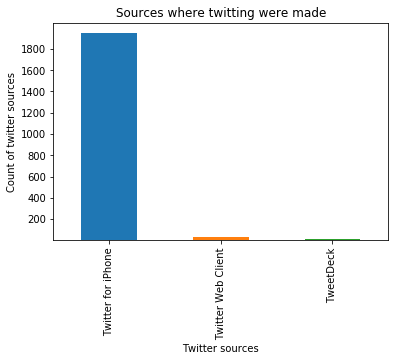

In [75]:
twitter_archive_master["source"].value_counts().plot(kind = 'bar')
plt.title("Sources where twitting were made")
plt.ylabel('Count of twitter sources')
plt.xlabel('Twitter sources')
plt.yticks(np.arange(200,1900,200))
plt.show()

# 2. What is the most common Dog name?

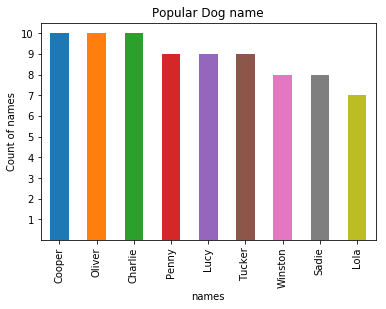

In [76]:
# pname = twitter_archive_master.name.value_counts()
twitter_archive_master["name"].value_counts()[1:10].plot(kind = 'bar')
plt.title("Popular Dog name")
plt.ylabel('Count of names')
plt.xlabel('names')
plt.yticks(np.arange(1,11,1))
plt.show()

# 3. what is the relationship between favourite count and retweet count`

Text(0.5,0,'Favourite counts')

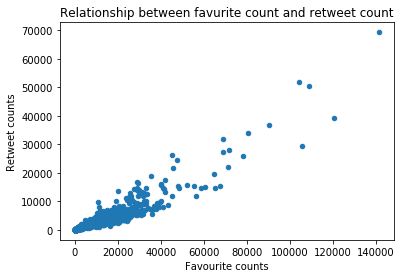

In [77]:
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Favorite and Retweet');
plt.title("Relationship between favurite count and retweet count")
plt.ylabel('Retweet counts')
plt.xlabel("Favourite counts")

## References

https://stackoverflow.com/questions/24848925/how-to-install-tweepy-with-anacondas-and-easy-install

https://teky.medium.com/get-twitter-api-keys-and-tokens-808455c4109a

https://github.com/Abhishek20182/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb

https://gitlab.com/Medonati/udacity-data-analyst-nanodegree/-/blob/master/Project%204%3A%20Wrangle%20and%20Analyze/wrangle_act.ipynb

https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py

https://www.tutorialspoint.com/how-to-set-x-axis-values-in-matplotlib-python

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

https://github.com/Monicajhe/Wrangle-and-Analyze-Data